In [1]:
import numpy as np
from numpy.linalg import inv


In [6]:
from numpy.linalg import norm

In [25]:
def nextIterate(lastIterate, hessian,gradient):
    y = lastIterate
    D2 = hessian(y)
    G = gradient(y)
    #print(D2)
    #print(y - inv(D2)@G)
    return y - inv(D2)@G

In [97]:
def newton(x0,hessian, gradient, epsilon,fun):
    x = x0
    y = x0
    counter = 0
    x_iterates = [x0]
    f_iterates = [fun(x0)]
    while norm(gradient(y) > epsilon):
        #print(gradient(y))
        
        last = y
        y = nextIterate(x,hessian,gradient)
        x_iterates.append(y)
        f_iterates.append(fun(y))
        x = last
        counter += 1
    return y,counter,x_iterates,f_iterates

In [44]:
def testFun(x):
    return x[0]**4+x[1]**4

In [27]:
def testGrad(x):
    return np.array([4*x[0]**3, 4*x[1]**3])

In [28]:
def testHess(x):
    #print(np.array([12*x[0]**2,0,0,12*x[1]**2]).reshape(2,2))
    return np.array([12*x[0]**2,0,0,12*x[1]**2]).reshape(2,2)

In [29]:
norm([1,1])

1.4142135623730951

In [77]:
guess = np.array([10,10])
eps = 1e-5

res = newton(guess,testHess,testGrad,eps,testFun)
x = res[0]
iterations = res[1]
x_its = np.array(res[2])
f_its = np.array(res[3])
x_path = x_its[:,0]
y_path = x_its[:,1]

print('Optimal point: ', x)
print('Number of iterations: ', iterations)
print(x_path.shape)
print(y_path.shape)

Optimal point:  [0.01014959 0.01014959]
Number of iterations:  33
(33,)
(33,)


In [37]:
import matplotlib.pyplot as plt

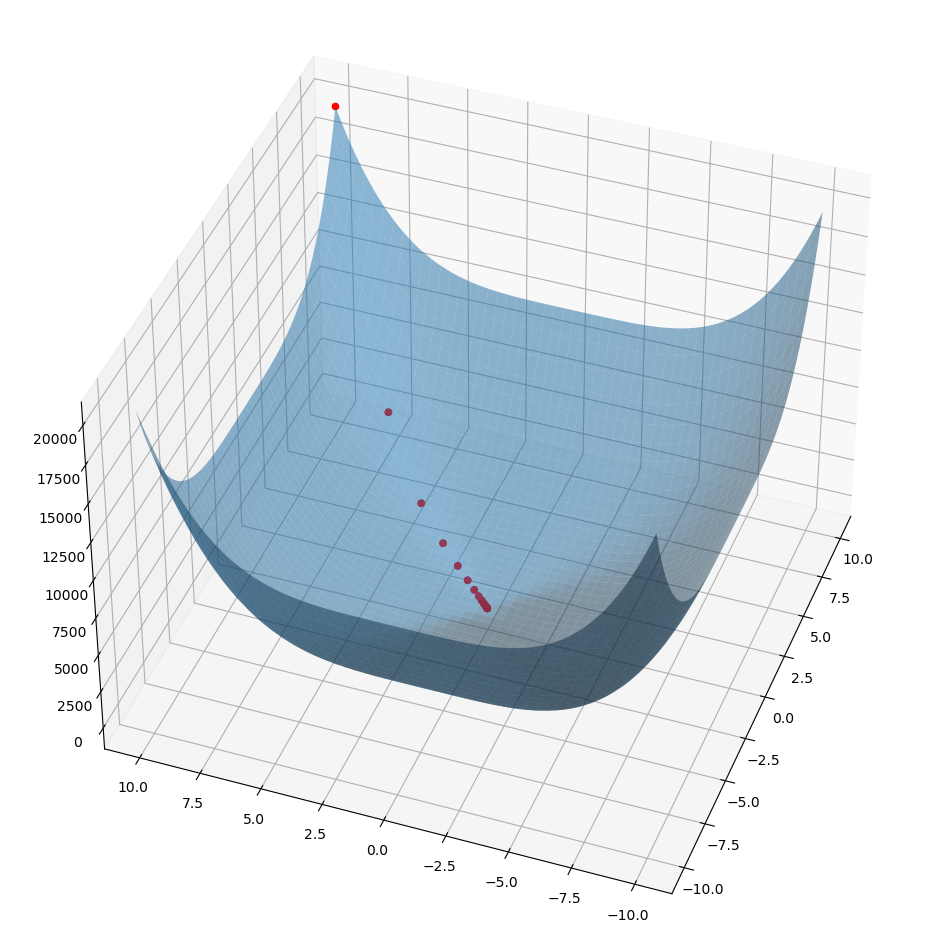

In [84]:
a = np.linspace(-10,10,1000)
b = np.linspace(-10,10,1000)
X,Y = np.meshgrid(a,b)
Z = X**4 + Y**4

fig, ax = plt.subplots(figsize=(12,18),dpi=100,subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=True,alpha=0.5)
ax.scatter(x_path,y_path,f_its,marker='o',color='red',alpha=1)
ax.view_init(azim=200,elev=40)
plt.show()

In [85]:
def testF2(x):
    return 4*x[0]**2 + x[1]**2

In [86]:
def testG2(x):
    return np.array([8*x[0],2*x[1]])

In [87]:
def testH2(x):
    return np.array([8,0,0,2]).reshape(2,2)

In [91]:
def fPlot(X,Y,fun):
    m,n = X.shape
    res = np.zeros([m,n])
    for i in range(m):
        for j in range(n):
            res[i,j] = fun(np.array([X[i,j],Y[i,j]]))
    return res

In [109]:
def performTest(fun,grad,hess):
    guess = np.array([5.9,7.835])
    eps = 1e-5

    res = newton(guess,hess,grad,eps,fun)
    x = res[0]
    iterations = res[1]
    x_its = np.array(res[2])
    f_its = np.array(res[3])
    x_path = x_its[:,0]
    y_path = x_its[:,1]
    
    print('Optimal point: ', x)
    print('Number of iterations: ', iterations)
    
    a = np.linspace(-10,10,1000)
    b = np.linspace(-10,10,1000)
    X,Y = np.meshgrid(a,b)
    Z = fPlot(X,Y,fun)

    fig, ax = plt.subplots(figsize=(12,18),dpi=100,subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(X, Y, Z,
                           linewidth=0, antialiased=True,alpha=0.5)
    ax.scatter(x_path,y_path,f_its,marker='o',color='red',alpha=1)
    ax.view_init(azim=200,elev=35)
    plt.show()

Optimal point:  [0. 0.]
Number of iterations:  1


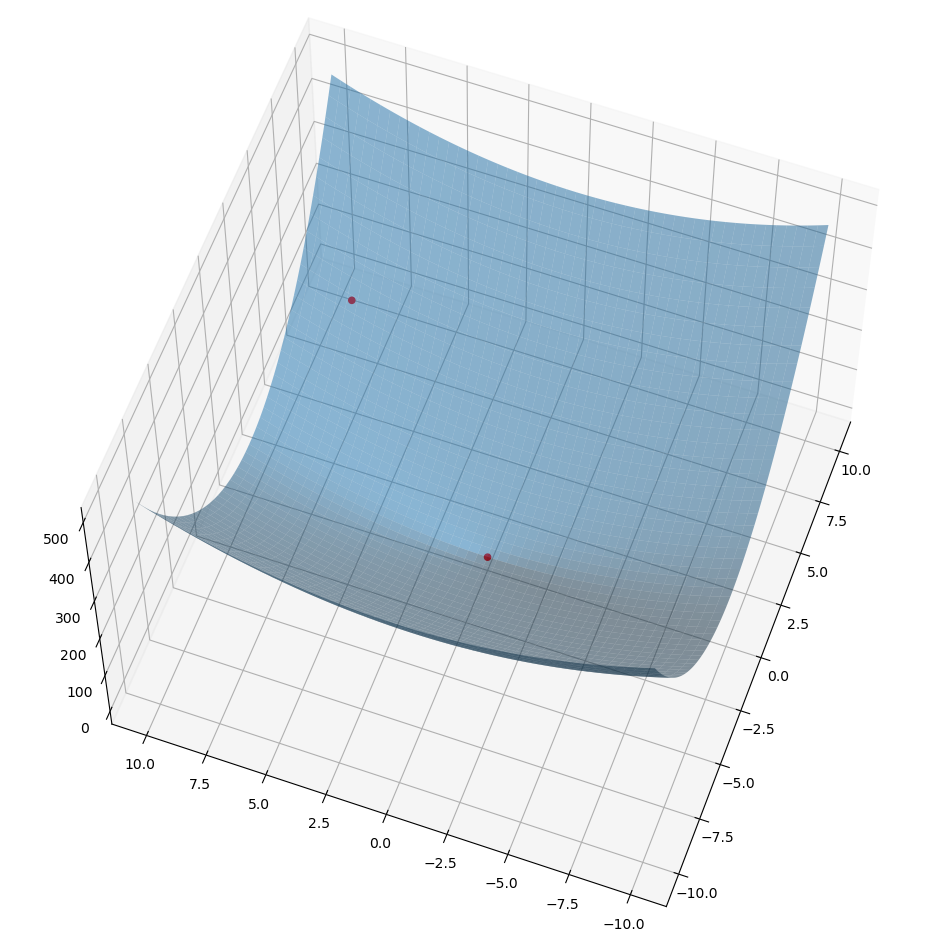

In [102]:
performTest(testF2,testG2,testH2)

In [115]:
def fTest3(x):
    return x[0]**4 + 2*x[1]**4 - 100*x[0]**2

In [116]:
def gTest3(x):
    return np.array([4*x[0]**3 - 200*x[0],8*x[1]**3])

In [117]:
def hTest3(x):
    return np.array([12*x[0]**2 - 200,0,0,24*x[1]**3]).reshape(2,2)

Optimal point:  [ 7.07106781 -0.165     ]
Number of iterations:  47


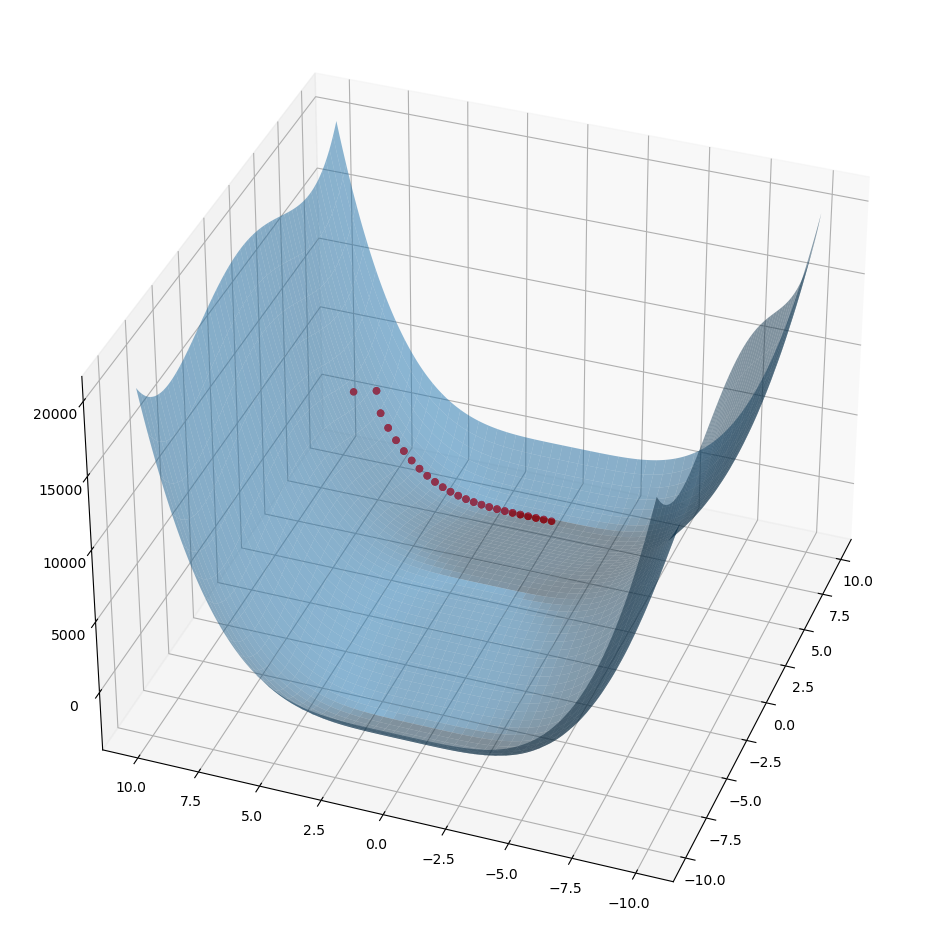

In [118]:
performTest(fTest3,gTest3,hTest3)

In [119]:
def fTest4(x):
    return x[0]**2*np.sin(x[1]) + x[1]**2 *np.cos(x[0])

In [121]:
def gTest4(x):
    x0 = x[0]
    x1 = x[1]
    return np.array(2*x0*np.sin(x1) - )

In [124]:
def hTest4(x):
    return np.array([2*np.sin(x[1]),2*x[0]*np.cos(x[1]),-2*x[1]*np.sin(x[1]),2*np.cos(x[0])]).reshape(2,2)

Optimal point:  [-214.68797495  -21.99806248]
Number of iterations:  15


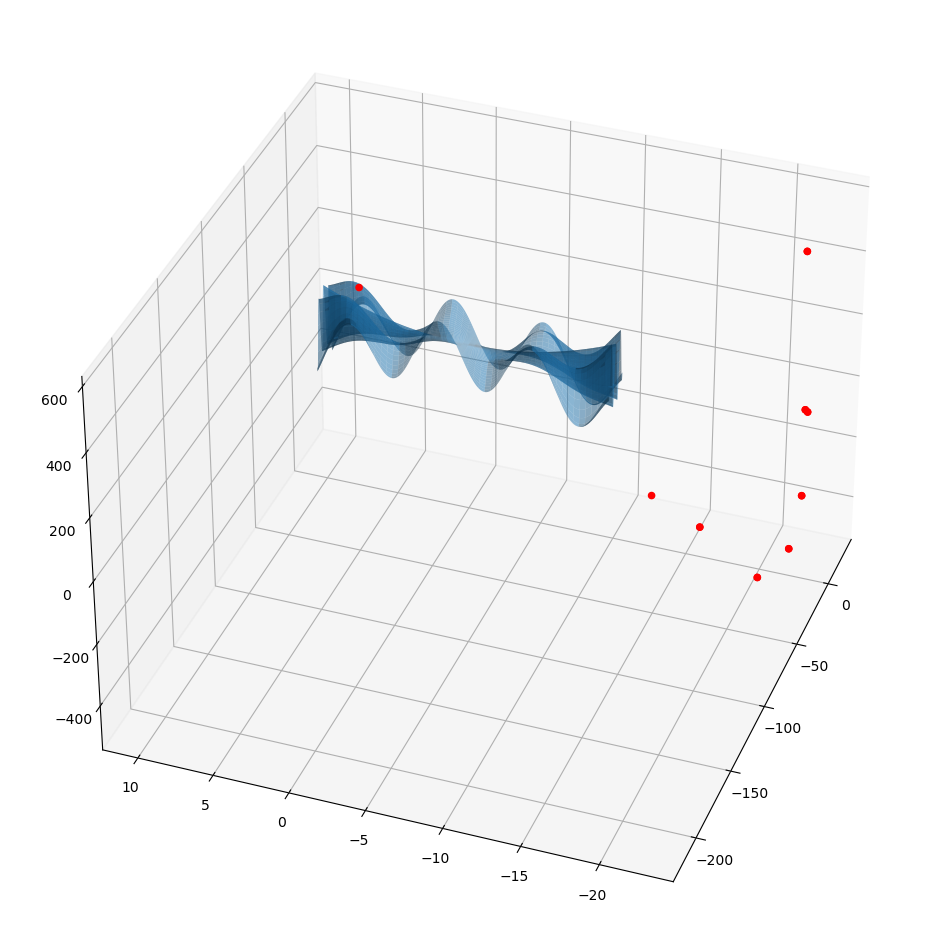

In [125]:
performTest(fTest4,gTest4,hTest4)